# Crawling

In [1]:
! pip install playwright
! pip install beautifulsoup4

   ---------------------------------------- 29.7/29.7 MB 10.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
#from playwright.sync_api import sync_playwright
from playwright.async_api import async_playwright
from bs4 import BeautifulSoup

def extract_text_from_page(html_content):
    soup = BeautifulSoup(html_content, 'html.parser')
    card_areas = soup.find_all('div', class_='card_area')
    texts = [card.get_text(separator=' ', strip=True) for card in card_areas]
    return texts

url = "https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=축제"

contents_crawled = []

with async_playwright() as p:
    browser = p.chromium.launch(headless=True)
    page = browser.new_page()
    page.goto(url)
    page.wait_for_timeout(100)  # 페이지 로딩 대기시간 조절 : 0.1초
    for page_index in range(1, 5): # 네이버 축제 정보 1~29
        # 페이지 내용 가져오기
        html = page.content()
        texts = extract_text_from_page(html)
        contents_crawled.append(f"{texts}")
        print(f"Page {page_index} processed.")
        # 다음 버튼 클릭
        next_button = page.query_selector('a.pg_next.on[data-kgs-page-action-next]')
        if next_button:
            next_button.click()
            page.wait_for_timeout(100)  # 페이지 로딩 대기시간 조절 : 0.1초
        else:
            print(f"Next button not found on page {page_index}")
            break
    browser.close()

texts = contents_crawled[-1]
texts = texts.split('행사중')[1:]
results = []
for i in range(len(texts)):
    texts[i] = texts[i].split('지도 길찾기')[0].strip()
    event_name = texts[i].split('기간')[0].strip()
    event_period = texts[i].split('기간')[-1].split('장소')[0].strip()
    event_place = texts[i].split('장소')[-1].strip()
    results.append({"event_name":event_name, "event_period":event_period, "event_place":event_place})

print(results)

In [9]:
from bs4 import BeautifulSoup
from selenium import webdriver
import time

driver = webdriver.Chrome('C:\chromedriver.exe')

#크롬드라이버 실행
driver.get(url)
time.sleep(2)



AttributeError: 'str' object has no attribute 'capabilities'

In [10]:


def get_event_info_from_naver(url="https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=축제"):
    from playwright.sync_api import sync_playwright
    from bs4 import BeautifulSoup
    def extract_text_from_page(html_content):
        soup = BeautifulSoup(html_content, 'html.parser')
        card_areas = soup.find_all('div', class_='card_area')
        texts = [card.get_text(separator=' ', strip=True) for card in card_areas]
        return texts
    contents_crawled = []
    with sync_playwright() as p:
        browser = p.chromium.launch(headless=True)
        page = browser.new_page()
        page.goto(url)
        page.wait_for_timeout(100)  # 페이지 로딩 대기시간 조절 : 0.1초
        for page_index in range(1, 1): # 네이버 축제 정보 1~29
            # 페이지 내용 가져오기
            html = page.content()
            texts = extract_text_from_page(html)
            contents_crawled.append(f"{texts}")
            print(f"Page {page_index} processed.")
            # 다음 버튼 클릭
            next_button = page.query_selector('a.pg_next.on[data-kgs-page-action-next]')
            if next_button:
                next_button.click()
                page.wait_for_timeout(100)  # 페이지 로딩 대기시간 조절 : 0.1초
            else:
                print(f"Next button not found on page {page_index}")
                break
        browser.close()
    texts = contents_crawled[-1]
    texts = texts.split('행사중')[1:]
    results = []
    for i in range(len(texts)):
        texts[i] = texts[i].split('지도 길찾기')[0].strip()
        event_name = texts[i].split('기간')[0].strip()
        event_period = texts[i].split('기간')[-1].split('장소')[0].strip()
        event_place = texts[i].split('장소')[-1].strip()
        results.append({"event_name":event_name, "event_period":event_period, "event_place":event_place})
    return results


print(get_event_info_from_naver())

Error: It looks like you are using Playwright Sync API inside the asyncio loop.
Please use the Async API instead.

In [11]:
results = [{'event_name': '장수 쿨밸리 페스티벌', 'event_period': '2024.08.02. ~ 2024.08.11.', 'event_place': '전북특별자치도 장수군 방화동자연휴양림'}, 
           {'event_name': '국가유산 미디어아트 진주성', 'event_period': '2024.08.02. ~ 2024.08.25.', 'event_place': '경상남도 진주시 진주성'}, 
           {'event_name': '강릉국제청소년예술축전', 'event_period': '2024.07.30. ~ 2024.08.11.', 'event_place': '강원특별자치도 강릉시 월화거리'}, 
           {'event_name': '한강페스티벌', 'event_period': '2024.07.26. ~ 2024.08.11.', 'event_place': '서울특별시 광진구 뚝섬한강공원'}, 
           {'event_name': '고스트파크 어웨이크', 'event_period': '2024.07.29. ~ 2024.08.18.', 'event_place': '경상남도 합천군 합천영상테마파크'}, 
           {'event_name': '홍천황금보리축제', 'event_period': '2024.07.26. ~ 2024.08.18.', 'event_place': '강원특별자치도 홍천군 보리울권역무궁화체험관'}, 
           {'event_name': '아시아프', 'event_period': '2024.07.30. ~ 2024.08.25.', 'event_place': '서울특별시 용산구 옛 국립극단 백성희장민호극장'}, 
           {'event_name': '태백 해바라기축제', 'event_period': '2024.07.19. ~ 2024.08.15.', 'event_place': '강원 태백시 태백 해바라기축제'}, 
           {'event_name': "영남춤축제 '춤,보고싶다'", 'event_period': '2024.07.13. ~ 2024.08.10.', 'event_place': '부산 부산진구 국립부산국악원'}, 
           {'event_name': '심야공포촌, Horror Village In The Dead of Night', 'event_period': '2024.07.26. ~ 2024.08.25.', 'event_place': '경기도 용인시 한국민속촌'}, 
           {'event_name': '율봄식물원 봉선화 시즌', 'event_period': '2024.08.03. ~ 2024.09.08.', 'event_place': '경기도 광주시 율봄식물원'}, 
           {'event_name': '렛츠런파크 부산경남 블루밍 워터페스티벌', 'event_period': '2024.07.06. ~ 2024.08.25.', 'event_place': '부산광역시 강서구 렛츠런파크 부산경남'}, 
           {'event_name': '베어트리파크 SUMMER FESTIVAL', 'event_period': '2024.07.06. ~ 2024.08.25.', 'event_place': '세종특별자치시 전동면 베어트리파크'}, 
           {'event_name': '쁘띠프랑스 & 이탈리아마을 베니스가면축제', 'event_period': '2024.07.01. ~ 2024.08.31.', 'event_place': '경기도 가평군 쁘띠프랑스'}, 
           {'event_name': '휴애리 유럽 수국축제', 'event_period': '2024.07.19. ~ 2024.09.15.', 'event_place': '제주특별자치도 서귀포시 휴애리자연생활공원'}, 
           {'event_name': '한국민속촌 여름축제: 마른 하늘에 물벼락', 'event_period': '2024.06.22. ~ 2024.08.25.', 'event_place': '경기도 용인시 한국민속촌'}, 
           {'event_name': '화담숲 여름 수국 축제', 'event_period': '2024.06.17. ~ 2024.08.23.', 'event_place': '경기도 광주시 화담숲'}, 
           {'event_name': '이월드 트로피컬 아쿠아월드', 'event_period': '2024.06.15. ~ 2024.08.31.', 'event_place': '대구광역시 달서구 이월드'}, 
           {'event_name': '동강국제사진제', 'event_period': '2024.07.12. ~ 2024.09.29.', 'event_place': '강원특별자치도 영월군 동강사진박물관'}, 
           {'event_name': '용설애(愛) FESTA', 'event_period': '2024.07.20. ~ 2024.10.20.', 'event_place': '경기도 안성시 안성연극협회'}]

import pandas as pd

df = pd.DataFrame(results)
df

,event_name,event_period,event_place
0,장수 쿨밸리 페스티벌,2024.08.02. ~ 2024.08.11.,전북특별자치도 장수군 방화동자연휴양림
1,국가유산 미디어아트 진주성,2024.08.02. ~ 2024.08.25.,경상남도 진주시 진주성
2,강릉국제청소년예술축전,2024.07.30. ~ 2024.08.11.,강원특별자치도 강릉시 월화거리
3,한강페스티벌,2024.07.26. ~ 2024.08.11.,서울특별시 광진구 뚝섬한강공원
4,고스트파크 어웨이크,2024.07.29. ~ 2024.08.18.,경상남도 합천군 합천영상테마파크
5,홍천황금보리축제,2024.07.26. ~ 2024.08.18.,강원특별자치도 홍천군 보리울권역무궁화체험관
6,아시아프,2024.07.30. ~ 2024.08.25.,서울특별시 용산구 옛 국립극단 백성희장민호극장
7,태백 해바라기축제,2024.07.19. ~ 2024.08.15.,강원 태백시 태백 해바라기축제
8,"영남춤축제 '춤,보고싶다'",2024.07.13. ~ 2024.08.10.,부산 부산진구 국립부산국악원
9,"심야공포촌, Horror Village In The Dead of Night",2024.07.26. ~ 2024.08.25.,경기도 용인시 한국민속촌


In [14]:
str(df)

"                                    event_name               event_period  \\\n0                                  장수 쿨밸리 페스티벌  2024.08.02. ~ 2024.08.11.   \n1                               국가유산 미디어아트 진주성  2024.08.02. ~ 2024.08.25.   \n2                                  강릉국제청소년예술축전  2024.07.30. ~ 2024.08.11.   \n3                                       한강페스티벌  2024.07.26. ~ 2024.08.11.   \n4                                   고스트파크 어웨이크  2024.07.29. ~ 2024.08.18.   \n5                                     홍천황금보리축제  2024.07.26. ~ 2024.08.18.   \n6                                         아시아프  2024.07.30. ~ 2024.08.25.   \n7                                    태백 해바라기축제  2024.07.19. ~ 2024.08.15.   \n8                               영남춤축제 '춤,보고싶다'  2024.07.13. ~ 2024.08.10.   \n9   심야공포촌, Horror Village In The Dead of Night  2024.07.26. ~ 2024.08.25.   \n10                                율봄식물원 봉선화 시즌  2024.08.03. ~ 2024.09.08.   \n11                       렛츠런파크 부산경남 블루밍 워터페스티벌  2024.07.06. ~ 

In [13]:
df.to_dict()

{'event_name': {0: '장수 쿨밸리 페스티벌',
  1: '국가유산 미디어아트 진주성',
  2: '강릉국제청소년예술축전',
  3: '한강페스티벌',
  4: '고스트파크 어웨이크',
  5: '홍천황금보리축제',
  6: '아시아프',
  7: '태백 해바라기축제',
  8: "영남춤축제 '춤,보고싶다'",
  9: '심야공포촌, Horror Village In The Dead of Night',
  10: '율봄식물원 봉선화 시즌',
  11: '렛츠런파크 부산경남 블루밍 워터페스티벌',
  12: '베어트리파크 SUMMER FESTIVAL',
  13: '쁘띠프랑스 & 이탈리아마을 베니스가면축제',
  14: '휴애리 유럽 수국축제',
  15: '한국민속촌 여름축제: 마른 하늘에 물벼락',
  16: '화담숲 여름 수국 축제',
  17: '이월드 트로피컬 아쿠아월드',
  18: '동강국제사진제',
  19: '용설애(愛) FESTA'},
 'event_period': {0: '2024.08.02. ~ 2024.08.11.',
  1: '2024.08.02. ~ 2024.08.25.',
  2: '2024.07.30. ~ 2024.08.11.',
  3: '2024.07.26. ~ 2024.08.11.',
  4: '2024.07.29. ~ 2024.08.18.',
  5: '2024.07.26. ~ 2024.08.18.',
  6: '2024.07.30. ~ 2024.08.25.',
  7: '2024.07.19. ~ 2024.08.15.',
  8: '2024.07.13. ~ 2024.08.10.',
  9: '2024.07.26. ~ 2024.08.25.',
  10: '2024.08.03. ~ 2024.09.08.',
  11: '2024.07.06. ~ 2024.08.25.',
  12: '2024.07.06. ~ 2024.08.25.',
  13: '2024.07.01. ~ 2024.08.31.',
  14: '2024.07.

In [ ]:
KDB_index = 'kdbtest_vectorized_tokenized_jihoon'
mapping = opensearch_client.indices.get_mapping(index=KDB_index)

In [1]:
aa = [1,2,3]
bb = str(aa)
print(type(aa), type(bb))

<class 'list'> <class 'str'>


In [2]:
bb

'[1, 2, 3]'

In [1]:
import pandas as pd

df = pd.read_csv('event_list.csv')
df['event_place'] = df['event_place'].apply(lambda x : x.replace(' 좌석배치도', ''))
df.tail(10)

,event_name,event_period_start,event_period_end,event_place
204,나은아 바이올린 독주회,2024.08.11.,2024.08.11.,금호아트홀 연세
205,긴긴밤 - 남양주,2024.08.10.,2024.08.11.,다산아트홀
206,조선의 하녀들,2024.08.09.,2024.08.11.,설렘아트홀
207,유앤나와 함께하는 달빛과 별들의 노래,2024.08.11.,2024.08.11.,거암아트홀
208,오즈의 마법사,2024.08.08.,2024.08.11.,이화여고 100주년 기념관
209,햇살 따뜻한 오후에 찾아온 특별한 손님 - 광주,2024.08.10.,2024.08.11.,국립아시아문화전당
210,첼리스트 홍진호 <진호의 책방> - 익산,2024.08.11.,2024.08.11.,익산예술의전당
211,2024 The Masterpiece Concert (더 마스터피스 콘서트) - 인천,2024.08.10.,2024.08.11.,인스파이어 아레나
212,말린 고추와 복숭아향 립스틱,2024.08.02.,2024.08.11.,아르코예술극장 소극장
213,류가희의 해금 <編 : 엮어가다> - 춘천,2024.08.11.,2024.08.11.,예나아트홀


In [2]:
df.to_csv('event_list.csv', index=False)

In [1]:
# import libaray and packages
%matplotlib inline
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [9]:
# 국토정보맵 수치지형도 ver2
# UFID : 건물, 도로, 교량, 하천 등 인공 및 자연 지형지물에 부여되는 코드

D1 = gpd.read_file('../../jido_example/N3A_A0010000.shp', encoding='cp949')
D1.head()

,UFID,geometry
0,1000037608078A00110000000000002809,"POLYGON ((193688.229 551259.818, 193690.36 551..."
1,1000037608078A00110000000000002810,"POLYGON ((193688.229 551259.818, 193686.549 55..."
2,1000037608078A00110000000000002811,"POLYGON ((193376.04 551355.14, 193376.12 55135..."
3,1000037608078A00110000000000002812,"POLYGON ((193378.365 551166.347, 193378.006 55..."
4,1000037608078A00110000000000002813,"POLYGON ((193407.17 552735.827, 193387.93 5527..."


<Axes: >

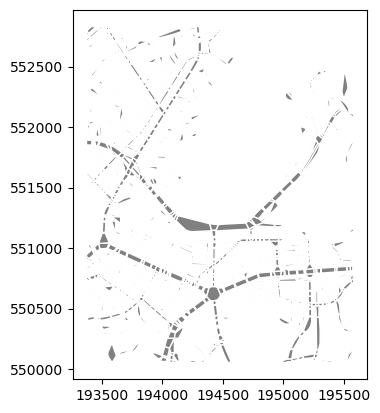

In [10]:
D1.convex_hull.plot(color='gray', edgecolor="w")

<Axes: >

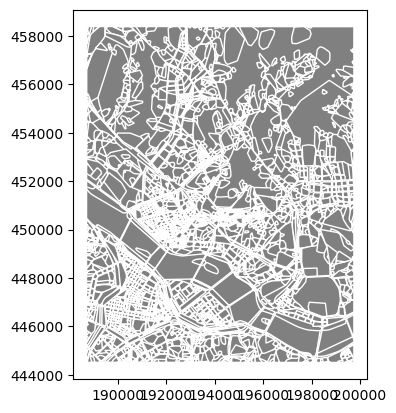

In [11]:
# 국토정보맵 토지이용현황도
# UDB: 토지이용코드(갯벌, 수목원 같은) >> 건물명 판단 불가
D1 = gpd.read_file('../../jido_example/(B010)수치지도_376084_2001_42133863027726.shp', encoding='cp949')
D1.convex_hull.plot(color='gray', edgecolor="w")

In [12]:
D1.head()

,UCB,geometry
0,3210,"POLYGON ((188724.53 444517.73, 188692.6 444517..."
1,3440,"POLYGON ((188692.67 444571.44, 188693.07 44486..."
2,4210,"POLYGON ((188693.07 444860.56, 188693.49 44517..."
3,3140,"POLYGON ((188693.49 445171.1, 188693.54 445205..."
4,3140,"POLYGON ((188693.59 445248.73, 188693.67 44530..."


In [13]:
# 브이월드 GIS건물통합정보
D1 = gpd.read_file('../../jido_example/AL_D010_27_20240806/AL_D010_27_20240806.shp', encoding='cp949')
D1.head()
#D1.convex_hull.plot(color='gray', edgecolor="w")

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A20,A21,A22,A23,A24,A25,A26,A27,A28,geometry
0,46627,1949163376372622421000000000,2711015600107350049,2711015600,대구광역시 중구 남산동,735-49,1,일반,None,None,...,None,None,2024-08-03,27110,None,None,0.0,0.0,2010-01-19,"POLYGON ((344085.261 363650.546, 344086.961 36..."
1,36767,0000163261862627417000000000,2711015600109210027,2711015600,대구광역시 중구 남산동,921-27,1,일반,None,None,...,None,None,2024-08-03,27110,None,None,0.0,0.0,2010-01-19,"POLYGON ((343959.519 364149.125, 343962.763 36..."
2,35691,1967162308722621416300000000,2711015600124210007,2711015600,대구광역시 중구 남산동,2421-7,1,일반,None,None,...,None,None,2024-08-03,27110,None,None,0.0,0.0,2010-01-19,"POLYGON ((343019.015 363528.968, 343022.49 363..."
3,32050,0000162752192638026400000000,2711014600100170000,2711014600,대구광역시 중구 북성로2가,17,1,일반,None,None,...,None,B00100000004G4ER7,2024-08-03,27110,None,None,0.0,0.0,2010-01-19,"POLYGON ((343425.115 365192.076, 343424.215 36..."
4,46412,0000163968822634982500000000,2711010200100020001,2711010200,대구광역시 중구 동인동2가,2-1,1,일반,None,None,...,None,None,2024-08-03,27110,None,None,0.0,0.0,2010-01-19,"POLYGON ((344649.65 364919.618, 344655.928 364..."


<Axes: >

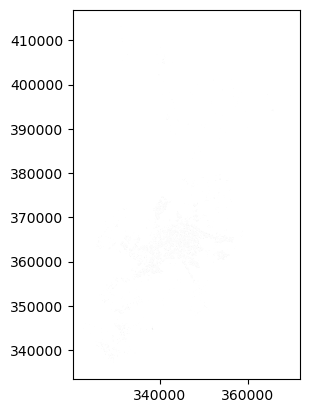

In [33]:
D1.convex_hull.plot(color='gray', edgecolor="w")

In [21]:
D1[['A24', 'A25']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 34475 entries, 59 to 382610
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A24     13834 non-null  object
 1   A25     34475 non-null  object
dtypes: object(2)
memory usage: 808.0+ KB


In [22]:
D1 = D1[~D1.A24.isna()]
D1.head()

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A20,A21,A22,A23,A24,A25,A26,A27,A28,geometry
59,32438,2009162306562626643500000000,2711015600101220000,2711015600,대구광역시 중구 남산동,122,1,일반,10000,교육연구시설,...,N,B00100000009IEA92,2024-08-03,27110,대구남산초등학교,급식소동,4.0,0.0,2022-04-16,"POLYGON ((342995.412 364051.821, 343016.927 36..."
78,32130,1961162119602630868600000000,2711015400102770001,2711015400,대구광역시 중구 대신동,277-1,1,일반,10000,교육연구시설,...,N,B00100000004G4SZT,2024-08-03,27110,계성중고등학교,3동(성재관),5.0,1.0,2017-02-21,"POLYGON ((342785.684 364443.032, 342779.709 36..."
80,32135,1994162507562626088000000000,2711015600101900060,2711015600,대구광역시 중구 남산동,190-60,1,일반,11000,노유자시설,...,N,B00100000004G4JQB,2024-08-03,27110,보호소,주2,2.0,1.0,2018-05-20,"POLYGON ((343195.53 363988.822, 343193.665 363..."
180,32388,1965162308872632701300000000,2711014000101940000,2711014000,대구광역시 중구 동산동,194,1,일반,10000,교육연구시설,...,N,B00100000004G4NWL,2024-08-03,27110,동산의료원,제33동,10.0,1.0,2019-03-21,"POLYGON ((342978.362 364669.561, 343013.073 36..."
194,32342,0000162345602633928800000000,2711014000101940000,2711014000,대구광역시 중구 동산동,194,1,일반,09000,의료시설,...,N,B00100000004G4N9X,2024-08-03,27110,동산동 1940000 의료시설 (학교법인 계명대학교),제03동,7.0,0.0,2019-03-21,"POLYGON ((342997.099 364786.126, 343038.453 36..."


In [41]:
ll = D1.A24.unique()
for i in range(50) :
    print(ll[i], end=', ')


대구남산초등학교, 계성중고등학교, 보호소, 동산의료원, 동산동 1940000 의료시설 (학교법인 계명대학교), 대한예수교장로회산격교회, 동인동3가 335-4 제2종근린생활시설 (서창원), 동인동2가 52-54 단독주택 (장원자), 교동 근린생활시, 미르치과, 경북대학교 의과대학, 청운맨션, 센트로 팰리스, 동서타운, 달성공원, 삼덕동2가 40-1 제2종근린생활시설 (박태순), 평리동 1107-8, 동인동1가 345-3 단독주택 (원경희), 보성황실아파트, 성지각산아파트, 남산동 592-6 제2종근린생활시설 (시수기), 대구경북지방병무청, 교동모닝하우스A, 달성동 146-5 창고시설 (김석희), 달성동 116-17 창고시설(이옥선), 대신동 상가, 동인동4가 531-2 단독주택 (예명희), 달성동 259-8 제1종근린생활시설 (김순자), 계산동주차빌딩신축공사, 동인동3가 271-42 단독주택 (도점남), 교동모닝하우스B, 봉산동 159-3 제1종근린생활시설 (김상우), 팔레스빌, 해피빌, 승리빌딩, 평리동 1137-24, 제1종근린생활시설 (곽동관), A동, 동인동4가 526-1 단독주택 (김병수), 대봉동 39-13 단독주택 (박오덕), 경북여자고등학교, 서문시장2지구 종합상가, 내이치과빌딩, 하나은행 대구중앙지점, 남산동 2185-38 단독주택 (서종림), 센트럴엠, 남산동 법당, 시지동 하늘타리, 서성로1가 43 제2종근린생활시설, 남성로 131 제1종근린생활시설 (박동철), 

In [1]:
import pandas as pd

df = pd.read_csv('event_crawling.csv')
df.tail(10)

,Unnamed: 0,k_date,title,place,lat,lon,url_link,start_date,end_date,area,category,dt
183,NaN,20240815,박강수 콘서트 - 순천,순천문화예술회관,NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240815,20240815,NaN,콘서트,20240815
184,NaN,20240815,향(HYANG) 단독 공연 : Take off,홍대 롤링홀,NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240815,20240815,NaN,콘서트,20240815
185,NaN,20240815,옥상달빛 전국투어 <정말 고마워서 갑니다 2024> - 동해,카페코스타,NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240815,20240815,NaN,콘서트,20240815
186,NaN,20240815,먼데이프로젝트 시즌7 OUR SUMMER [카디 단독 콘서트],KT&G 상상마당 라이브홀,NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240815,20240815,NaN,콘서트,20240815
187,NaN,20240815,2024 니엘 생일팬미팅 < Lips fairy forest >,일지아트홀,NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240815,20240815,NaN,콘서트,20240815
188,NaN,20240815,흡수(吸收) - 대구,꿈꾸는씨어터,NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240815,20240815,NaN,콘서트,20240815
189,NaN,20240815,A Moment With You,구름아래소극장,NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240815,20240815,NaN,콘서트,20240815
190,NaN,20240815,한여름밤의 꿈 페스티벌 <이슬아x이훤 작가의 북 콘서트> - 대구,수성아트피아,NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240815,20240815,NaN,콘서트,20240815
191,NaN,20240815,2024 광복절기념 콘서트 빛과 자유,빛과소리아트홀,NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240815,20240815,NaN,콘서트,20240815
192,NaN,20240815 ~ 20240825,NELL CLUB CONCERT 2024 'Our Eutopia' - 서울,명화라이브홀,NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240815,20240825,NaN,콘서트,20240815


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  175 non-null    float64
 1   k_date      193 non-null    object 
 2   title       193 non-null    object 
 3   place       189 non-null    object 
 4   lat         0 non-null      float64
 5   lon         0 non-null      float64
 6   url_link    193 non-null    object 
 7   start_date  193 non-null    int64  
 8   end_date    193 non-null    int64  
 9   area        0 non-null      float64
 10  category    193 non-null    object 
 11  dt          193 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 18.2+ KB


In [6]:
df[df.place.isna()]

,k_date,title,place,lat,lon,url_link,start_date,end_date,area,category,dt
36,20240529 ~ 20241201,문화가 있는 날 청춘마이크 충청권,NaN,NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240529,20241201,NaN,축제 > 문화예술축제,20240813
41,20240325 ~ 20241031,영등포 관광 세일 페스타,NaN,NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240325,20241031,NaN,축제,20240813


In [3]:
import re
df.category = df.category.apply(lambda x : re.sub(r'\d+분', '', x).strip())
df.tail(10)

,k_date,title,place,lat,lon,url_link,start_date,end_date,area,category,dt
167,20240814,"2024 커피콘서트 VI - 이지연 재즈 오케스트라의 ""OST JAZZ CONCER...",동구문화체육센터,NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240814,20240814,NaN,콘서트 > 재즈/블루스,20240813
168,20240814,2024 썸머나이트 <룰라 & 레게 강 같은 평화> 콘서트 - 경주,경주예술의전당,NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240814,20240814,NaN,콘서트,20240813
169,20240814,먼데이프로젝트 시즌7 My Universe [시소 (siso) 단독 콘서트],벨로주 홍대,NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240814,20240814,NaN,콘서트,20240813
170,20240529 ~ 20241201,문화가 있는 날 청춘마이크 충청권,NaN,NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240529,20241201,NaN,축제 > 문화예술축제,20240814
171,20240325 ~ 20241031,영등포 관광 세일 페스타,NaN,NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240325,20241031,NaN,축제,20240814
172,20240814,살아 숨쉬는 영화 음악 콘서트 - Fantasy Melody - 경기 광주,남한산성아트홀 소극장,NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240814,20240814,NaN,콘서트,20240814
173,20240814,정우 단독 공연 <누군가를 사랑한다는 것>,웨스트브릿지 라이브홀,NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240814,20240814,NaN,콘서트,20240814
174,20240814,펀치라인스 - 로스트데이,클럽온에어,NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240814,20240814,NaN,콘서트 > 개그/마술,20240814
175,20240814,광복절 전야음악회 <8.15 SEOUL MY SOUL>,광화문광장,NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240814,20240814,NaN,콘서트,20240814
176,20240814,뒤란 - 울산,울산문화예술회관 소공연장,NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240814,20240814,NaN,콘서트,20240814


In [5]:
df = df.iloc[:, 1:10]
df = df.astype(str)
df[['lat', 'lon', 'area']]=None
df.head()
#df.astype(str)
#df.info()

,k_date,title,place,lat,lon,url_link,start_date,end_date,area
0,20240809 ~ 20240814,통영한산대첩축제,한산대첩광장 및 통영시 일원,None,None,https://search.naver.com/search.naver?where=ne...,20240809,20240814,None
1,20240813 ~ 20240815,서대문독립축제,"서대문형무소역사관, 독립공원",None,None,https://search.naver.com/search.naver?where=ne...,20240813,20240815,None
2,20240810 ~ 20240815,신송도해변축제,송도달빛공원 일원 (송도국제교~컨벤시아교 사이),None,None,https://search.naver.com/search.naver?where=ne...,20240810,20240815,None
3,20240809 ~ 20240817,대전 0시 축제,중앙로(대전역 ~ 옛충남도청) 일원,None,None,https://search.naver.com/search.naver?where=ne...,20240809,20240817,None
4,20240808 ~ 20240818,천리포행 무궁화호,천리포수목원,None,None,https://search.naver.com/search.naver?where=ne...,20240808,20240818,None


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   k_date      193 non-null    object
 1   title       193 non-null    object
 2   place       193 non-null    object
 3   lat         0 non-null      object
 4   lon         0 non-null      object
 5   url_link    193 non-null    object
 6   start_date  193 non-null    object
 7   end_date    193 non-null    object
 8   area        0 non-null      object
dtypes: object(9)
memory usage: 13.7+ KB


In [7]:
df.to_csv('event_crawling.csv', index=False)

In [8]:
df.loc[0, 'url_link']

'https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&mra=bk00&pkid=110&os=1908491&qvt=0&query=%ED%86%B5%EC%98%81%ED%95%9C%EC%82%B0%EB%8C%80%EC%B2%A9%EC%B6%95%EC%A0%9C'

In [7]:
import pandas as pd

df1 = pd.read_csv('event_crawling.csv')
df1.head()
#df2 = pd.read_csv('event_crawling_2.csv')

,k_date,title,place,lat,lon,url_link,start_date,end_date,area,category,dt
0,20240809 ~ 20240814,통영한산대첩축제,한산대첩광장 및 통영시 일원,NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240809,20240814,NaN,NaN,NaN
1,20240813 ~ 20240815,서대문독립축제,"서대문형무소역사관, 독립공원",NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240813,20240815,NaN,NaN,NaN
2,20240810 ~ 20240815,신송도해변축제,송도달빛공원 일원 (송도국제교~컨벤시아교 사이),NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240810,20240815,NaN,NaN,NaN
3,20240809 ~ 20240817,대전 0시 축제,중앙로(대전역 ~ 옛충남도청) 일원,NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240809,20240817,NaN,NaN,NaN
4,20240808 ~ 20240818,천리포행 무궁화호,천리포수목원,36.7989,126.1494,https://search.naver.com/search.naver?where=ne...,20240808,20240818,충남,NaN,NaN


In [8]:
df1.tail()

,k_date,title,place,lat,lon,url_link,start_date,end_date,area,category,dt
229,20240824 ~ 20240824,제천박달가요제,제천시 모산비행장,NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240824,20240824,NaN,축제,20240819.0
230,20240824 ~ 20240825,제주 애니아일랜드 페스티벌,아시아CGI애니메이션센터,NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240824,20240825,NaN,축제,20240819.0
231,20240824 ~ 20240901,고양 푸드앤비어페스티벌,라페스타 문화의거리,37.6607,126.7690,https://search.naver.com/search.naver?where=ne...,20240824,20240901,경기,축제 > 여름먹거리축제,20240819.0
232,20240824 ~ 20240908,서천 홍원항 자연산 전어 꽃게 축제,홍원항,36.1563,126.5195,https://search.naver.com/search.naver?where=ne...,20240824,20240908,충남,축제 > 대하전어축제,20240819.0
233,20240819,먼데이프로젝트 시즌7 My Universe [YEGNY (최예근) 단독 콘서트],클럽온에어,NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240819,20240819,NaN,콘서트,20240819.0


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   k_date      0 non-null      object 
 1   title       0 non-null      object 
 2   place       0 non-null      object 
 3   lat         0 non-null      float64
 4   lon         0 non-null      float64
 5   url_link    0 non-null      object 
 6   start_date  0 non-null      int64  
 7   end_date    0 non-null      int64  
 8   area        0 non-null      object 
 9   category    0 non-null      object 
 10  dt          0 non-null      float64
dtypes: float64(3), int64(2), object(6)
memory usage: 0.0+ bytes


In [9]:
con1 = df1.start_date <= 20240825
con2 = df1.end_date >= 20240825
con3 = df1.area == '경기'
df1 = df1[con1 & con2 & con3]

df1.head()

,k_date,title,place,lat,lon,url_link,start_date,end_date,area,category,dt
13,20240726 ~ 20240825,"심야공포촌, Horror Village In The Dead of Night",한국민속촌,37.2594,127.1206,https://search.naver.com/search.naver?where=ne...,20240726,20240825,경기,NaN,NaN
17,20240701 ~ 20240831,쁘띠프랑스 & 이탈리아마을 베니스가면축제,쁘띠프랑스 & 이탈리아마을,37.7156,127.4906,https://search.naver.com/search.naver?where=ne...,20240701,20240831,경기,NaN,NaN
19,20240622 ~ 20240825,한국민속촌 여름축제: 마른 하늘에 물벼락,한국민속촌,37.2594,127.1206,https://search.naver.com/search.naver?where=ne...,20240622,20240825,경기,NaN,NaN
28,20240511 ~ 20240908,양평메기수염축제,수미마을,37.5145,127.6574,https://search.naver.com/search.naver?where=ne...,20240511,20240908,경기,NaN,NaN
38,20240406 ~ 20241110,한국민속촌 조선살인수사,한국민속촌,37.2594,127.1206,https://search.naver.com/search.naver?where=ne...,20240406,20241110,경기,NaN,NaN


In [11]:
events_crawled = df1

events_condition = """
    con1 = events_crawled.start_date <= 20240825
    con2 = events_crawled.end_date >= 20240825
    con3 = events_crawled.area == '경기'
    events_crawled = events_crawled[con1 & con2 & con3]
    """

exec(events_condition)

events_crawled

IndentationError: unexpected indent (<string>, line 2)

In [2]:
df1.head()

,k_date,title,place,lat,lon,url_link,start_date,end_date,area,category,dt
0,20240809 ~ 20240814,통영한산대첩축제,한산대첩광장 및 통영시 일원,NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240809,20240814,NaN,NaN,NaN
1,20240813 ~ 20240815,서대문독립축제,"서대문형무소역사관, 독립공원",NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240813,20240815,NaN,NaN,NaN
2,20240810 ~ 20240815,신송도해변축제,송도달빛공원 일원 (송도국제교~컨벤시아교 사이),NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240810,20240815,NaN,NaN,NaN
3,20240809 ~ 20240817,대전 0시 축제,중앙로(대전역 ~ 옛충남도청) 일원,NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240809,20240817,NaN,NaN,NaN
4,20240808 ~ 20240818,천리포행 무궁화호,천리포수목원,NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240808,20240818,NaN,NaN,NaN


In [3]:
df2.head()

,k_date,title,place,lat,lon,url_link,start_date,end_date,area,category,dt
0,20240809 ~ 20240814,통영한산대첩축제,한산대첩광장 및 통영시 일원,NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240809,20240814,NaN,축제 > 바다축제,20240813
1,20240813 ~ 20240815,서대문독립축제,"서대문형무소역사관, 독립공원",NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240813,20240815,NaN,축제,20240813
2,20240810 ~ 20240815,신송도해변축제,송도달빛공원 일원 (송도국제교~컨벤시아교 사이),NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240810,20240815,NaN,축제 > 바다축제,20240813
3,20240809 ~ 20240817,대전 0시 축제,중앙로(대전역 ~ 옛충남도청) 일원,NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240809,20240817,NaN,축제,20240813
4,20240808 ~ 20240818,천리포행 무궁화호,천리포수목원,NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240808,20240818,NaN,축제 > 여름꽃축제,20240813


In [4]:
df1.shape

(234, 11)

In [5]:
df2.shape

(170, 11)

In [16]:
df1[df1.duplicated(subset=['url_link'])]

,k_date,title,place,lat,lon,url_link,start_date,end_date,area,category,dt
193,20240720 ~ 20241031,구팔일 선셋 레이스,모노리스 제주파크,NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240720,20241031,NaN,축제,20240818.0
222,20240529 ~ 20241201,문화가 있는 날 청춘마이크 충청권,NaN,NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240529,20241201,NaN,축제 > 문화예술축제,20240819.0
223,20240325 ~ 20241031,영등포 관광 세일 페스타,NaN,NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240325,20241031,NaN,축제,20240819.0


In [8]:
df2.nunique()

k_date        149
title         169
place         137
lat             0
lon             0
url_link      170
start_date    113
end_date       91
area            0
category       39
dt              1
dtype: int64

In [15]:
df3 = pd.concat([df1, df2]).drop_duplicates(subset=['title', 'url_link'], keep='last')
df3

,k_date,title,place,lat,lon,url_link,start_date,end_date,area,category,dt
170,20240814,살아 숨쉬는 영화 음악 콘서트 - Fantasy Melody - 경기 광주,남한산성아트홀 소극장,NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240814,20240814,NaN,NaN,NaN
171,20240814,정우 단독 공연 <누군가를 사랑한다는 것>,웨스트브릿지 라이브홀,NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240814,20240814,NaN,NaN,NaN
172,20240814,펀치라인스 - 로스트데이,클럽온에어,NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240814,20240814,NaN,NaN,NaN
173,20240814,광복절 전야음악회 <8.15 SEOUL MY SOUL>,광화문광장,NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240814,20240814,NaN,NaN,NaN
174,20240814,뒤란 - 울산,울산문화예술회관 소공연장,NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240814,20240814,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
165,20150406,걸 스토리 콘서트,SMTOWN THEATRE,NaN,NaN,https://search.naver.com/search.naver?where=ne...,20150406,20150406,NaN,콘서트 > 콘서트 45분,20240813.0
166,20240814,2024 VIVIZ WORLD TOUR [V.hind : Love and Tears...,Montgomery Theater,NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240814,20240814,NaN,콘서트,20240813.0
167,20240814,"2024 커피콘서트 VI - 이지연 재즈 오케스트라의 ""OST JAZZ CONCER...",동구문화체육센터,NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240814,20240814,NaN,콘서트 > 재즈/블루스 80분,20240813.0
168,20240814,2024 썸머나이트 <룰라 & 레게 강 같은 평화> 콘서트 - 경주,경주예술의전당,NaN,NaN,https://search.naver.com/search.naver?where=ne...,20240814,20240814,NaN,콘서트 90분,20240813.0
